In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

filename = "dog_rates_tweets.csv"
dataframe1 = pd.read_table(filename, sep=',' ,index_col=0, parse_dates=[1])

In [2]:
# Generate column for rating
dataframe1['rate'] = dataframe1['text'].str.extract(r'(\d+(\.\d+)?)/10', expand=False)[0]

# Generate column indicate if data has a rating
dataframe1['hasRate'] = dataframe1['rate'].notnull()

# Drop all non-rating records
dataframe1 = dataframe1[dataframe1['hasRate']==True]

# Convert rate from string to float
dataframe1['rate'] = dataframe1['rate'].apply(lambda x: float(x))

# Drop all outliers (rate > 20)
dataframe1 = dataframe1[dataframe1['rate']<=20]

# Generate timestamp column
dataframe1['timestamp'] = dataframe1['created_at'].apply(lambda x: x.timestamp())

In [3]:
fit = stats.linregress(dataframe1['timestamp'], dataframe1['rate'])
dataframe1['fit_y'] = dataframe1['timestamp']*fit.slope + fit.intercept

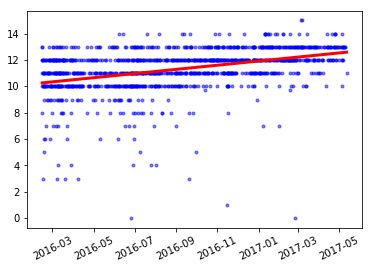

In [4]:
plt.xticks(rotation=25)
plt.plot(dataframe1["created_at"] ,dataframe1["rate"], 'b.', alpha=0.5)
plt.plot(dataframe1["created_at"] ,dataframe1["fit_y"], 'r-',linewidth=3)
plt.show()

In [12]:
print("P-value for the fit :",fit.pvalue)
print("As p-value < 0.05 , H0 is rejected. Thus the slope is different from 0 (y depends on x)")

P-value for the fit : 2.62541672742e-44
As p-value < 0.05 , H0 is rejected. Thus the slope is different from 0 (y depends on x)


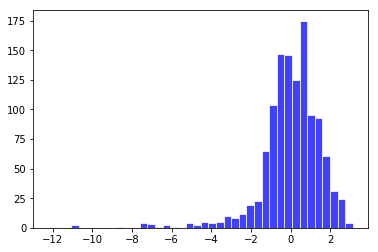

In [11]:
residuals = dataframe1["rate"] - dataframe1["fit_y"]
plt.hist(residuals.values, 40, facecolor='blue',edgecolor='white', alpha=0.75)
plt.show()